##### 🔬Problem overview
*****

As the CEOs/Founders  of a startup focused on adoption of electric vehicles (EV) to the Saudi market aligning with Saudi Arabia vision 2030  to accelerate the transition to sustainable transportation, We need to understand the factors influencing consumer preferences, adoption rates, and overall market trends for electric vehicles ,but to do so effectively, we must base our strategies on solid data analysis and market insights. Addressing the five key questions derived from the data collected can help us overcome challenges and make informed decisions.



1.Which country has the highest adoption of electric vehicles?

2.What are the trends in EV adoption over time?

3.How does EV adoption vary by geographic location?

4.Which manufacturers and models are most popular among electric vehicle owners?

5.What is the relationship between electric vehicle range and vehicle type?

6.Can we build a model that could classify vehicles based on their electric range?



##### 🏗️Import Necessary Libraries
****

In [2]:
import requests
import pandas as pd

# visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##### 📊 Data Collection
##### API request call

*****

Data source:
The dataset used in this project was obtained from the Electric Vehicle Data API hosted on RapidAPI. This API provides comprehensive information about electric vehicles, including specifications like electric range, manufacturer details, model specifics, and more. The data was accessed using the Python requests library to query the API and then processed using the Pandas library for analysis and model preparation.

API Details:

API Name: Electric Vehicle Data API
Access URL: https://rapidapi.com/adrienpelletierlaroche/api/electric-vehicle-data2
Date of Access: Monday, March 25, 2024,9:31:07 AM
Data Retrieval Method: API requests via requests library in Python.

Challenges Encountered:
-Rate Limiting: API access was subject to rate limiting we were able to only get 500 rows ,and the same rows resulted in each request made.

In [61]:
## API Request
url = "https://electric-vehicle-data2.p.rapidapi.com/records"

querystring = {"limit":"500","orderBy":"dataListIndex_asc"}

headers = {
	"X-RapidAPI-Key": "cdf8b1cb59mshf343db793d63080p109824jsn8aeb3d1ed903",
	"X-RapidAPI-Host": "electric-vehicle-data2.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)


data = response.json()
vehicles = data['data']
processed_data = []


for v in vehicles:
    
        # Extract necessary fields, adjusting keys as per the actual data structure
        v_county = v.get('county', '')
        v_city = v.get('city', '')
        v_modelyear = v.get('modelYear', '')
        v_make = v.get('make', '')
        v_model = v.get('model', '')
        v_electricVehicleType = v.get('electricVehicleType', '')
        v_electricRange = v.get('electricRange', '')
        v_electricUtility = v.get('electricUtility', '')

        # Append the extracted information as a dictionary to our list
        processed_data.append({
            'county': v_county,
            'city': v_city,
            'modelYear': v_modelyear,
            'make': v_make,
            'model': v_model,
            'electricVehicleType': v_electricVehicleType,
            'electricRange': v_electricRange,
            'electricUtility': v_electricUtility
        })
   

# Convert the processed data into a DataFrame
df = pd.DataFrame(processed_data)

# Now `df` contains only the specified number of rows.
# You can now export this DataFrame to a CSV file
df.to_csv('electricVehicledata.csv', index=False)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### Data Aggregation
***
Data Aggregation usually refers to the process of gathering data from multiple sources and summarizing it for analysis. It might involve combining similar data from different datasets to get a more comprehensive view or to perform statistical analysis on a larger scale.


Due to the API's constraint of limiting data extraction to 500 rows per request(same rows results in each request), we will augment the dataset obtained from the API by incorporating an additional dataset sourced from Kaggle that have the same API's fields. This  will enable us to conduct a more extensive and nuanced analysis by leveraging a larger dataset.

Kaggle data source:https://www.kaggle.com/datasets/utkarshx27/electric-vehicle-population-data



In [3]:
# read the kaggle's dataset
df = pd.read_csv('kaggle_ev_data.csv')
df2 = pd.read_csv('electricVehicledata.csv')

# View first 10 rows
display(df.head(10))

#drop the fields that are not compatible with the API's fields
df = df.drop(['VIN (1-10)', 'State','Postal Code','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Base MSRP','Legislative District','DOL Vehicle ID','Vehicle Location','2020 Census Tract'], axis=1)
df = df.iloc[600:3500]
# View first 10 rows after dropping the fields
display(df.head(10))


# Concatenate the DataFrames
combined_df = pd.concat([df, df2], ignore_index=True)
combined_df.to_csv('combined_dataset(unstructured).csv', index=False)




,VIN (1-10),county,city,State,Postal Code,modelYear,make,model,electricVehicleType,Clean Alternative Fuel Vehicle (CAFV) Eligibility,electricRange,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,electricUtility,2020 Census Tract
0,5YJ3E1EB4L,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,14.0,127175366,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,5YJ3E1EA7K,San Diego,San Diego,CA,92101.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,266614659,POINT (-117.16171 32.71568),NaN,6.073005e+09
2,7JRBR0FL9M,Lane,Eugene,OR,97404.0,2021,VOLVO,S60,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,NaN,144502018,POINT (-123.12802 44.09573),NaN,4.103900e+10
3,5YJXCBE21K,Yakima,Yakima,WA,98908.0,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,14.0,477039944,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
4,5UXKT0C5XH,Snohomish,Bothell,WA,98021.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,1.0,106314946,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
5,1N4AZ0CP4F,Snohomish,Everett,WA,98201.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,38.0,107901699,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,5.306104e+10
6,5YJ3E1EBXJ,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,475036313,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303594e+10
7,WDC0G5EB0K,Yakima,Naches,WA,98937.0,2019,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10,0,14.0,338148968,POINT (-120.69972 46.7309),PACIFICORP,5.307700e+10
8,1N4AZ0CP3D,Kitsap,Port Orchard,WA,98366.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,26.0,249239623,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
9,KNDCC3LD9K,Kitsap,Olalla,WA,98359.0,2019,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,26.0,475609368,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10


,county,city,modelYear,make,model,electricVehicleType,electricRange,electricUtility
600,Snohomish,Lynnwood,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,PUGET SOUND ENERGY INC
601,Kitsap,Port Orchard,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0,PUGET SOUND ENERGY INC
602,Pierce,Eatonville,2021,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),42,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
603,King,Lake Forest Park,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
604,King,Kirkland,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
605,King,Kirkland,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),215,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
606,Mason,Hoodsport,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
607,Snohomish,Granite Falls,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0,PUGET SOUND ENERGY INC
608,King,Issaquah,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),208,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
609,King,North Bend,2018,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),33,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


# 📝 Data Preprocessing and cleaning


#### Take a first look at the data

In [4]:
data  =pd.read_csv('combined_dataset.csv')
# Viewing the first few rows
print(data.head())

      county              city  modelYear       make       model  \
0  Snohomish          Lynnwood       2022      TESLA     MODEL Y   
1     Kitsap      Port Orchard       2021      TESLA     MODEL 3   
2     Pierce        Eatonville       2021     TOYOTA  RAV4 PRIME   
3       King  Lake Forest Park       2013  CHEVROLET        VOLT   
4       King          Kirkland       2023      TESLA     MODEL Y   

                      electricVehicleType  electricRange  \
0          Battery Electric Vehicle (BEV)              0   
1          Battery Electric Vehicle (BEV)              0   
2  Plug-in Hybrid Electric Vehicle (PHEV)             42   
3  Plug-in Hybrid Electric Vehicle (PHEV)             38   
4          Battery Electric Vehicle (BEV)              0   

                                     electricUtility  
0                             PUGET SOUND ENERGY INC  
1                             PUGET SOUND ENERGY INC  
2  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...  
3      PUG

In [4]:
data.shape

(3357, 8)

###### There are 3354 rows and 8 columns in the dataset.

In [5]:
data.dtypes

county                 object
city                   object
modelYear               int64
make                   object
model                  object
electricVehicleType    object
electricRange           int64
electricUtility        object
dtype: object

###### There are 2 numerical attributes and 6 categorical attributes in the dataset, model years for vehicles is represented as integers ,because they refer to a specific calendar year and are not used in calculations we will change its type to category.

In [6]:
# changing modelYear data type
data['modelYear'] = data['modelYear'].astype('category')

In [7]:

# Summary statistics for numerical features
print(data.describe())

       electricRange
count    3357.000000
mean       83.916592
std       101.080454
min         0.000000
25%         0.000000
50%        30.000000
75%       200.000000
max       330.000000


######  The electric range of vehicles in this dataset varies widely, as indicated by the high standard deviation. the average electric range across all vehicles is approximately 83.92 miles. This tells us that on average, the vehicles in this dataset can travel roughly 84 miles on a single charge ,there's a significant proportion of vehicles with no electric range(0), which might include missing data or data entry errors that need further investigation

In [8]:
## how many rows that has the electric rang = 0

print((data['electricRange']==0).sum())

1243


###### a large number of vehicles having a value of 0 (1243 vehicles). This could potentially indicate missing or unknown values in the dataset.

###### To account for this uncertainty and still make use of the available data we will fill the missing or zero electric range values with average values based on the vehicle model and type. 

In [9]:
# Identify entries with electricRange as 0
zero_range_filter = data['electricRange'] == 0

# Calculate the mean electricRange for each model and electricVehicleType combination
average_ranges = data[~zero_range_filter].groupby(['model', 'electricVehicleType'])['electricRange'].mean()

# Function to apply the replacement
def replace_zero_with_average(row):
    if row['electricRange'] == 0:  # If electricRange is 0, try to replace it
        # Use .get((row['model'], row['electricVehicleType']), default_value) to avoid KeyErrors
        return average_ranges.get((row['model'], row['electricVehicleType']), row['electricRange'])
    else:
        return row['electricRange']

# Apply the function
data['electricRange'] = data.apply(replace_zero_with_average, axis=1)

print((data['electricRange']==0).sum())

298


###### after running the code we could still see there's still 298 vehicles that has electric range = 0,we only replaced 945 vehicles with their mean electric range based on the model and electric vehicle type ,this could be one of the two reasons
###### one, some of the vehicles that has the same model and electric vehicle type all have electric range = 0 (and at that case we consider them outliers that could result in baised outcomes).Two, the vehicle that have electric range = 0 could have a unique model and type.
###### the 298 vehicles that have electric range = 0 will be dropped

In [10]:
# filter data to include vehicles with electric rang != 0
data = data[data['electricRange'] != 0]
print((data['electricRange']==0).sum())

0


##### Handeling missing value 
****


In [11]:
# Checking for any missing values
print(data.isnull().sum())

county                 0
city                   0
modelYear              0
make                   0
model                  0
electricVehicleType    0
electricRange          0
electricUtility        3
dtype: int64


In [12]:
# Find the rows where any cell has a missing value
rows_with_missing_values = data[data.isnull().any(axis=1)]

# Display the rows with missing values
print(rows_with_missing_values)

        county         city modelYear    make    model  \
115     Sonoma   Santa Rosa      2018   HONDA  CLARITY   
719   Thurston      Olympia      2019     KIA     NIRO   
1200   Pulaski  Little Rock      2019  NISSAN     LEAF   

                         electricVehicleType  electricRange electricUtility  
115   Plug-in Hybrid Electric Vehicle (PHEV)           47.0             NaN  
719   Plug-in Hybrid Electric Vehicle (PHEV)           26.0             NaN  
1200          Battery Electric Vehicle (BEV)          150.0             NaN  


###### for the 'electricUtility' column by imputation the utility data is typically associated with geography, we impute missing utilities based on the most common utility for that city and county.
###### -in check_1 we try to see the electric utility where county = Sonoma and city = santa Rosa ,the result is only 1 row(row 115) the one that contains the Nan ,we drop that row since we can't impute it.

###### -for check_2 we see that all the vehicles that have county = Thurston and = city Olympia has the electric utility = PUGET SOUND ENERGY INC, so we will replace the Nan with PUGET SOUND ENERGY INC.

###### -the same thing happen with check_1 resulted in check_3 , the result is only 1 row(row 1200) the one that contains the Nan ,we drop that row since we can't impute it.




In [13]:
check_1 = data[(data['county'] == 'Sonoma') & (data['city'] == 'Santa Rosa') ]
print(check_1)

# drop the single row resulted 
condition = (data['county'] == 'Sonoma') & (data['city'] == 'Santa Rosa')

# Invert the condition to select rows that do NOT match the criteria
data = data[~condition]


     county        city modelYear   make    model  \
115  Sonoma  Santa Rosa      2018  HONDA  CLARITY   

                        electricVehicleType  electricRange electricUtility  
115  Plug-in Hybrid Electric Vehicle (PHEV)           47.0             NaN  


In [14]:
check_2 = data[(data['county'] == 'Thurston') & (data['city'] == 'Olympia') ]
print(check_2)

## replace the rows that have county=Thurston and city=Olympia with electricUtility = PUGET SOUND ENERGY INC 
data.loc[(data['county'] == 'Thurston') & (data['city'] == 'Olympia'), 'electricUtility'] = 'PUGET SOUND ENERGY INC'

        county     city modelYear      make     model  \
105   Thurston  Olympia      2023     TESLA   MODEL Y   
126   Thurston  Olympia      2019       KIA      NIRO   
275   Thurston  Olympia      2018  CHRYSLER  PACIFICA   
434   Thurston  Olympia      2019       KIA      NIRO   
559   Thurston  Olympia      2022     TESLA   MODEL Y   
...        ...      ...       ...       ...       ...   
3299  Thurston  Olympia      2023       KIA      NIRO   
3301  Thurston  Olympia      2021     TESLA   MODEL Y   
3313  Thurston  Olympia      2021     TESLA   MODEL 3   
3314  Thurston  Olympia      2013    NISSAN      LEAF   
3353  Thurston  Olympia      2017      FIAT       500   

                         electricVehicleType  electricRange  \
105           Battery Electric Vehicle (BEV)     291.000000   
126           Battery Electric Vehicle (BEV)     239.000000   
275   Plug-in Hybrid Electric Vehicle (PHEV)      33.000000   
434           Battery Electric Vehicle (BEV)     239.000000   


In [15]:
check_3 = data[(data['county'] == 'Pulaski') & (data['city'] == 'Little Rock') ]
print(check_3)
 
#drop the single row resulted 
condition = (data['county'] == 'Pulaski') & (data['city'] == 'Little Rock')

# Invert the condition to select rows that do NOT match the criteria
data = data[~condition]


       county         city modelYear    make model  \
1200  Pulaski  Little Rock      2019  NISSAN  LEAF   

                 electricVehicleType  electricRange electricUtility  
1200  Battery Electric Vehicle (BEV)          150.0             NaN  


##### Handeling duplicates
****
###### we have 1013 duplicates that need to be removed 


In [16]:
# Checking for duplicate rows
print(data.duplicated().sum())

# romve duplicates
data = data.drop_duplicates()


1013


##### 🛠️Feature Engineering
****

###### In order to answer our 5th question which is 'Can we build a model that could classify vehicles based on their electric range?' we will first need to discretize the electric range into three class labels.This step is crucial because it transforms our regression problem into a classification problem, where each vehicle is assigned a label based on its electric range.

###### Short Range: Vehicles with a range of less than 100 miles.
###### Medium Range: Vehicles with a range of 100 to 200 miles.
###### Long Range: Vehicles with a range greater than 200 miles.

In [17]:
#  Discretize the electric range
bins = [0, 100, 200, float('inf')]
labels = ['Short Range', 'Medium Range', 'Long Range']
data['Range Class'] = pd.cut(data['electricRange'], bins=bins, labels=labels, include_lowest=True)


In [38]:
# saving the processed and cleaned data into CSV file
data.to_csv('electricVehicledata(structured_cleaned).csv', index=False)

#####  column Electric utility

In [50]:
def categorize_electric_utility(value):
    if isinstance(value, str):
        value = value.strip()  # Remove leading and trailing whitespace
        if "||" in value:
            return "Multi type Utilities"
        elif "|" in value:
            return "Single Type Utilities"
        else:
            return "Only One Option"
    else:
        return "Not Available"
    
    
    
data['Electric_Utility_Category'] = data['electricUtility'].apply(categorize_electric_utility)

In [51]:
data['Electric_Utility_Category'].unique()


array(['Only One Option', 'Multi type Utilities', 'Single Type Utilities'],
      dtype=object)

In [53]:
print(data.columns)

Index(['county', 'city', 'modelYear', 'make', 'model', 'electricVehicleType',
       'electricRange', 'electricUtility', 'Range Class',
       'Electric_Utility_Category'],
      dtype='object')


# Data Analysis and Visualaization

Text(0, 0.5, 'Count')

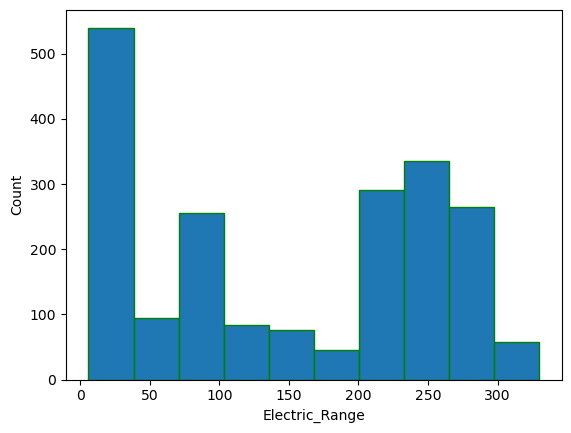

In [77]:
#Histogram plot of electric range
plt.hist(data["electricRange"],bins=10,edgecolor='green')
plt.xlabel("Electric_Range")
plt.ylabel("Count")

###### After observation The electric range colum , around 580 of cars are not provided with legit information. Instead it is filled with zeros.

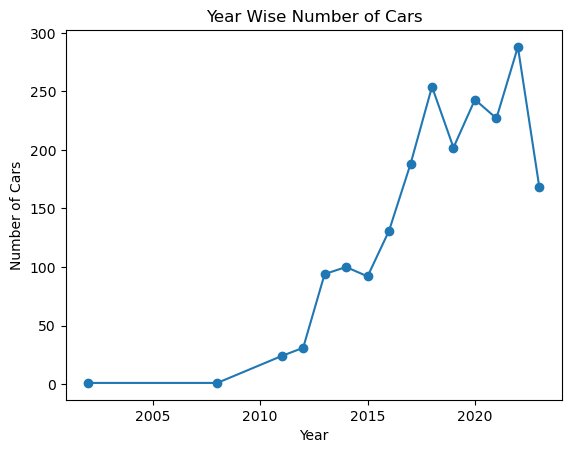

In [70]:
# Year Wise Cars

year_wise_cars = data.groupby('modelYear').size().reset_index(name='num_cars')

plt.plot(year_wise_cars['modelYear'], year_wise_cars['num_cars'], marker='o')
plt.title('Year Wise Number of Cars')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.show()

In [25]:
year_wise_cars.sort_values(by='num_cars', ascending=False).head(10)

,modelYear,num_cars
13,2022,288
9,2018,254
11,2020,243
12,2021,227
10,2019,202
8,2017,188
14,2023,168
7,2016,131
5,2014,100
4,2013,94


The market's trust in electric vehicles began to grow after 2010, and the demand for electric vehicles has been consistently increasing ever since. However, in 2019, there was a noticeable decline in demand. This drop was primarily caused by the lockdowns imposed due to the COVID-19 pandemic.

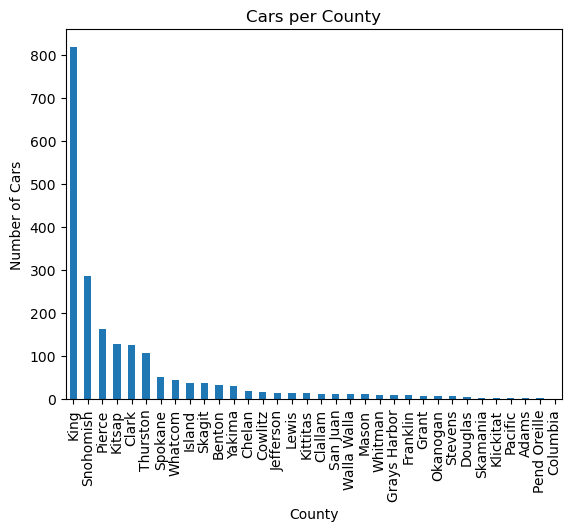

,count
county,
King,818
Snohomish,285
Pierce,163
Kitsap,127
Clark,126
Thurston,107
Spokane,50
Whatcom,43
Island,38


In [54]:
# Plot showing counties with count of cars
car_counts = data['county'].value_counts()

# plot the counts
car_counts.plot(kind='bar')
plt.xlabel('County')
plt.ylabel('Number of Cars')
plt.title('Cars per County')
plt.show()

car_counts_df = car_counts.to_frame()
car_counts_df.style.background_gradient(cmap='Blues')

King county has the highest number of electric cars registered with 818 cars, followed by Snohomish and Pierce county. The demand for cars gradually decreases as we move down the list, with Columbia County having the fewest cars.

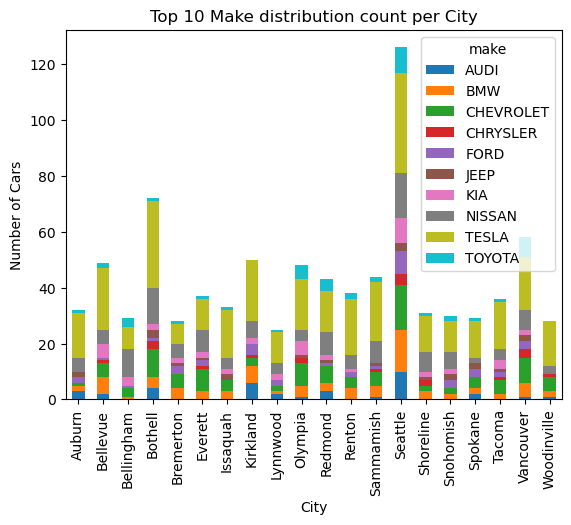

In [55]:
cnt_MkCity = data.groupby(['city', 'make']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_cty = cnt_MkCity.groupby(['city', 'make'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
city_counts = grouped_data_cty.groupby('city')['Count'].sum().reset_index()
make_counts = grouped_data_cty.groupby('make')['Count'].sum().reset_index()


# Sort the counties by count in descending order, and select the top 10
top_cities = city_counts.sort_values(by='Count', ascending=False).head(20)
top_makes = make_counts.sort_values(by='Count', ascending=False).head(10)


# Filter the data to only include the top 10 counties
filtered_data_Cty = grouped_data_cty[grouped_data_cty['city'].isin(top_cities['city']) & grouped_data_cty['make'].isin(top_makes['make'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_cty = filtered_data_Cty.pivot(index='city', columns='make', values='Count').fillna(0)

pivoted_data_cty.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Top 10 Make distribution count per City')
plt.xlabel('City')
plt.ylabel('Number of Cars')

# Show the plot
plt.show()

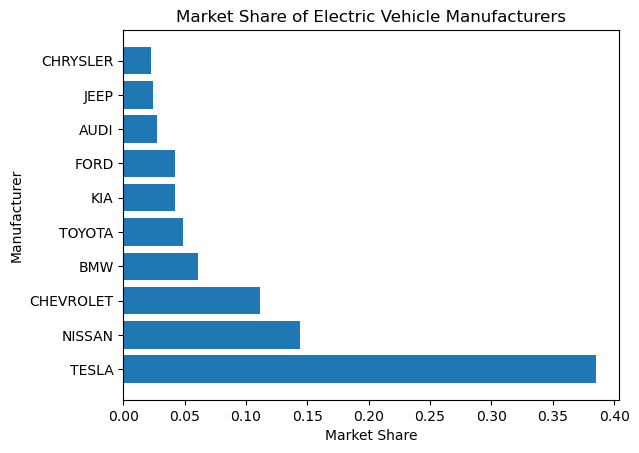

In [92]:
manufacturer_counts = data['make'].value_counts(normalize=True).head(10)

plt.barh(manufacturer_counts.index, manufacturer_counts.values)
plt.title('Market Share of Electric Vehicle Manufacturers')
plt.xlabel('Market Share')
plt.ylabel('Manufacturer')
plt.show()

Here we presents the top 20 counties with top 10 consumed make.the data suggests a positive market outlook for electric vehicles, with Tesla and Nissan emerging as popular choices among consumers. The presence of Seattle as a city with high EV adoption indicates a favorable market environment for electric vehicles,

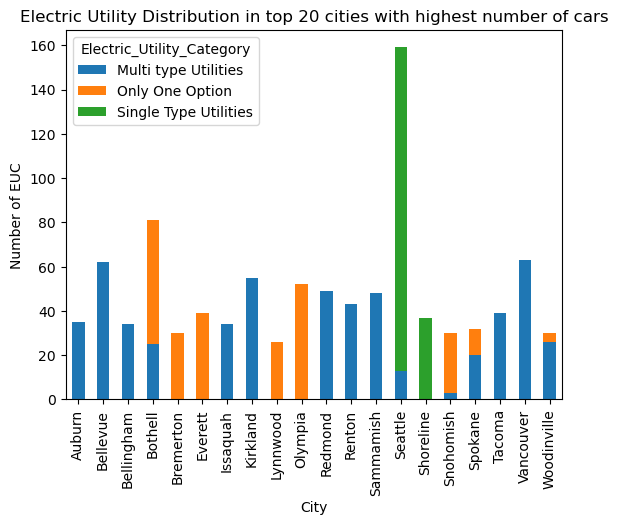

In [56]:
cnt_Cty_EUD = data.groupby(['city', 'Electric_Utility_Category']).size().reset_index(name='Count')

# Group the data by county and make, and sum the counts for each group
grouped_data_Cty_EUD = cnt_Cty_EUD.groupby(['city', 'Electric_Utility_Category'])['Count'].sum().reset_index()

# Group the data by county and sum the counts for each county
Cty_EUD_counts = grouped_data_Cty_EUD.groupby('city')['Count'].sum().reset_index()



# Sort the counties by count in descending order, and select the top 20
top_Cty_EUD_counts = Cty_EUD_counts.sort_values(by='Count', ascending=False).head(20)



# Filter the data to only include the top 20 counties
filtered_data_Cty_EUD = grouped_data_Cty_EUD[grouped_data_Cty_EUD['city'].isin(top_Cty_EUD_counts['city'])]


# Pivot the data to create a matrix with counties as rows, makes as columns, and counts as values
pivoted_data_Cty_EUD = filtered_data_Cty_EUD.pivot(index='city', columns='Electric_Utility_Category', values='Count').fillna(0)

# Create a stacked bar plot of the pivoted data
pivoted_data_Cty_EUD.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Electric Utility Distribution in top 20 cities with highest number of cars')
# plt.yscale('log')
plt.xlabel('City')
plt.ylabel('Number of EUC')

# Show the plot
plt.show()



This plot also shows that Seattle presents a significant market potential for other utility providers.

In [111]:
mile_range = pd.DataFrame(df.groupby('electricVehicleType')['electricRange'].mean().reset_index()).sort_values(by='electricRange', ascending=False).reset_index(drop=True)
mile_range.columns = ['vehicle_type', 'mile_range']

fig = px.pie(data_frame=mile_range, names='vehicle_type', values='mile_range', hover_name='mile_range', title='Vehicle Types with Mile Range', hole=True)
fig.show()

The pie chart displays the distribution of electric vehicle types based on their average kilometer range in the vehicle types. If the chart showed that 75% of the vehicles were Battery Electric Vehicles (BEVs) and 25% were Plug-in Hybrid Electric Vehicles (PHEVs), it indicates that BEVs dominate the market in terms of average kilometer range.

This distribution suggests that a significant portion of the electric vehicle market consists of purely electric vehicles (BEVs), which rely solely on battery power for propulsion. BEVs generally offer a longer all-electric range compared to PHEVs.

The presence of a smaller percentage of PHEVs indicates that there is still a market demand for vehicles that combine both internal combustion engines and electric motors. PHEVs offer the advantage of extended range through the use of both electric and gasoline power sources.

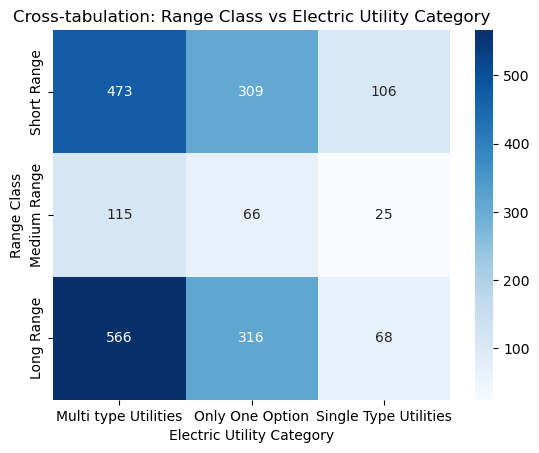

In [78]:
cross_tab = pd.crosstab(data['Range Class'], data['Electric_Utility_Category'])
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Cross-tabulation: Range Class vs Electric Utility Category')
plt.xlabel('Electric Utility Category')
plt.ylabel('Range Class')
plt.show()

Multi-type utilities tend to offer a wider range of electric vehicle options across all range classes, including short, medium, and long ranges. Additionally, there is a significant presence of electric vehicles with short ranges even in areas with limited utility options. Long-range electric vehicles are widely available across different utility categories, indicating a broader market presence for these vehicles. The availability of medium-range electric vehicles may be more limited in areas with only one utility option or a single type of utility provider.

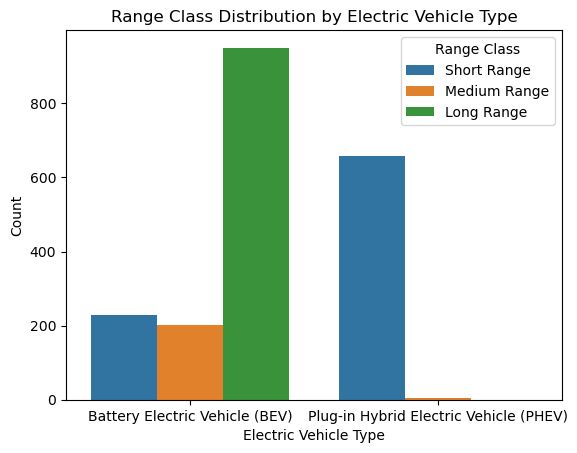

In [113]:
sns.countplot(x='electricVehicleType', hue='Range Class', data=data)
plt.title('Range Class Distribution by Electric Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.show()

the count data indicates a higher presence of long-range Battery Electric Vehicles (BEVs) compared to other range classes. Short-range options are also available for both BEVs and Plug-in Hybrid Electric Vehicles (PHEVs). However, the dataset does not include any PHEVs categorized as long-range, suggesting that long-range PHEVs may have limited representation in the our data.

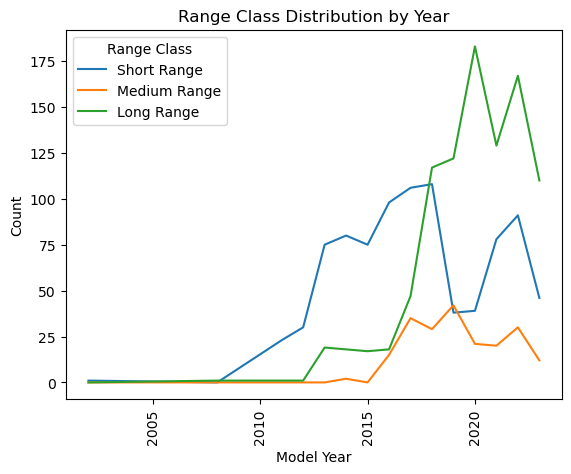

In [117]:
# Pivot the data to get the count of each range class for each model year
pivot_data = data.pivot_table(index='modelYear', columns='Range Class', aggfunc='size', fill_value=0)

# Reset the index to make 'modelYear' a column
pivot_data = pivot_data.reset_index()

# Reshape the data from wide to long format
melted_data = pivot_data.melt(id_vars='modelYear', var_name='Range Class', value_name='Count')

# Create the line plot
sns.lineplot(x='modelYear', y='Count', hue='Range Class', data=melted_data)

# Set plot title and labels
plt.title('Range Class Distribution by Year')
plt.xlabel('Model Year')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()



Short Range: The count of short-range vehicles is consistently higher than the count of medium-range vehicles across all 'Model Years' in the provided data. This suggests that a larger number of electric vehicles in the dataset have shorter driving ranges.

Medium Range: The count of medium-range vehicles remains relatively lower compared to short-range vehicles for most 'Model Years.' However, there is a gradual increase in the count of medium-range vehicles from 2016 onwards. This indicates a growing presence of electric vehicles with moderate driving ranges in more recent years.

Long Range: The count of long-range vehicles also increases over the years, with notable fluctuations. In the later years (starting from 2020), the count of long-range vehicles becomes higher than the count of medium-range vehicles, indicating the availability and adoption of electric vehicles with extended driving ranges.

Overall, the data suggests that while short-range vehicles dominate the count across 'Model Years,' there is a gradual increase in both medium-range and long-range electric vehicles over time. This could be attributed to advancements in battery technology, infrastructure development, and the demand for electric vehicles with longer driving ranges.